In [127]:
import numpy as np
import mne 
import scipy 
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [128]:
import cv2

In [120]:
sec=5
video_path='../../../mp.mp4'

In [121]:
def get_frame(video_path, sec):
    
    calc_timestamps = [0.0]
    cap = cv2.VideoCapture( video_path)
    timestamps = [cap.get(cv2.CAP_PROP_POS_MSEC)]
    fps = cap.get(cv2.CAP_PROP_FPS)

    while(cap.isOpened()):
        frame_exists, curr_frame = cap.read()
        #print(np.sum(curr_frame))
        #print('lol')
        if frame_exists:
            timestamps = cap.get(cv2.CAP_PROP_POS_MSEC)
            calc_timestamps.append(calc_timestamps[-1] + 1000/fps)
            ts=calc_timestamps[-1] + 1000/fps
            
            if sec<(ts/1000):
                print(ts/1000)
                #print('ghl;', np.sum(curr_frame))
                plt.figure()
                plt.imshow(curr_frame)
                break

In [122]:
#fps = vcap.get(cv2.CV_CAP_PROP_FPS)

def get_frmae(video_path, second):
    '''function probably is incorrect but it seemed to wors as get_frame'''
    
    #start=20
    
    vcap = cv2.VideoCapture( video_path)
    ret, frame = vcap.read()
    #fps = vcap.get(cv2.CAP_PROP_FPS)
    #times 1/24
    
    frame_num=int(second*24)

    for i in range(frame_num):
        #vcap = cv2.VideoCapture('../../../ks.mp4')
        ret, frame = vcap.read()
    #plt.close()
    print(second)
    print(i)
    plt.figure()
    plt.imshow(frame)



In [123]:
raw_data=mne.io.read_raw_brainvision('../../mp/NeoRec_2022-12-07_14-10-26.vhdr', preload=True)

Extracting parameters from ../../mp/NeoRec_2022-12-07_14-10-26.vhdr...
Setting channel info structure...
Reading 0 ... 1351953  =      0.000 ...   675.976 secs...


In [124]:
events,ids=mne.events_from_annotations(raw_data)

Used Annotations descriptions: ['1/Event', 'New Segment/']


In [125]:
raw_data.crop(events[-1,0]/raw_data.info['sfreq'], None)

<RawBrainVision | NeoRec_2022-12-07_14-10-26.eeg, 15 x 1325087 (662.5 s), ~151.7 MB, data loaded>

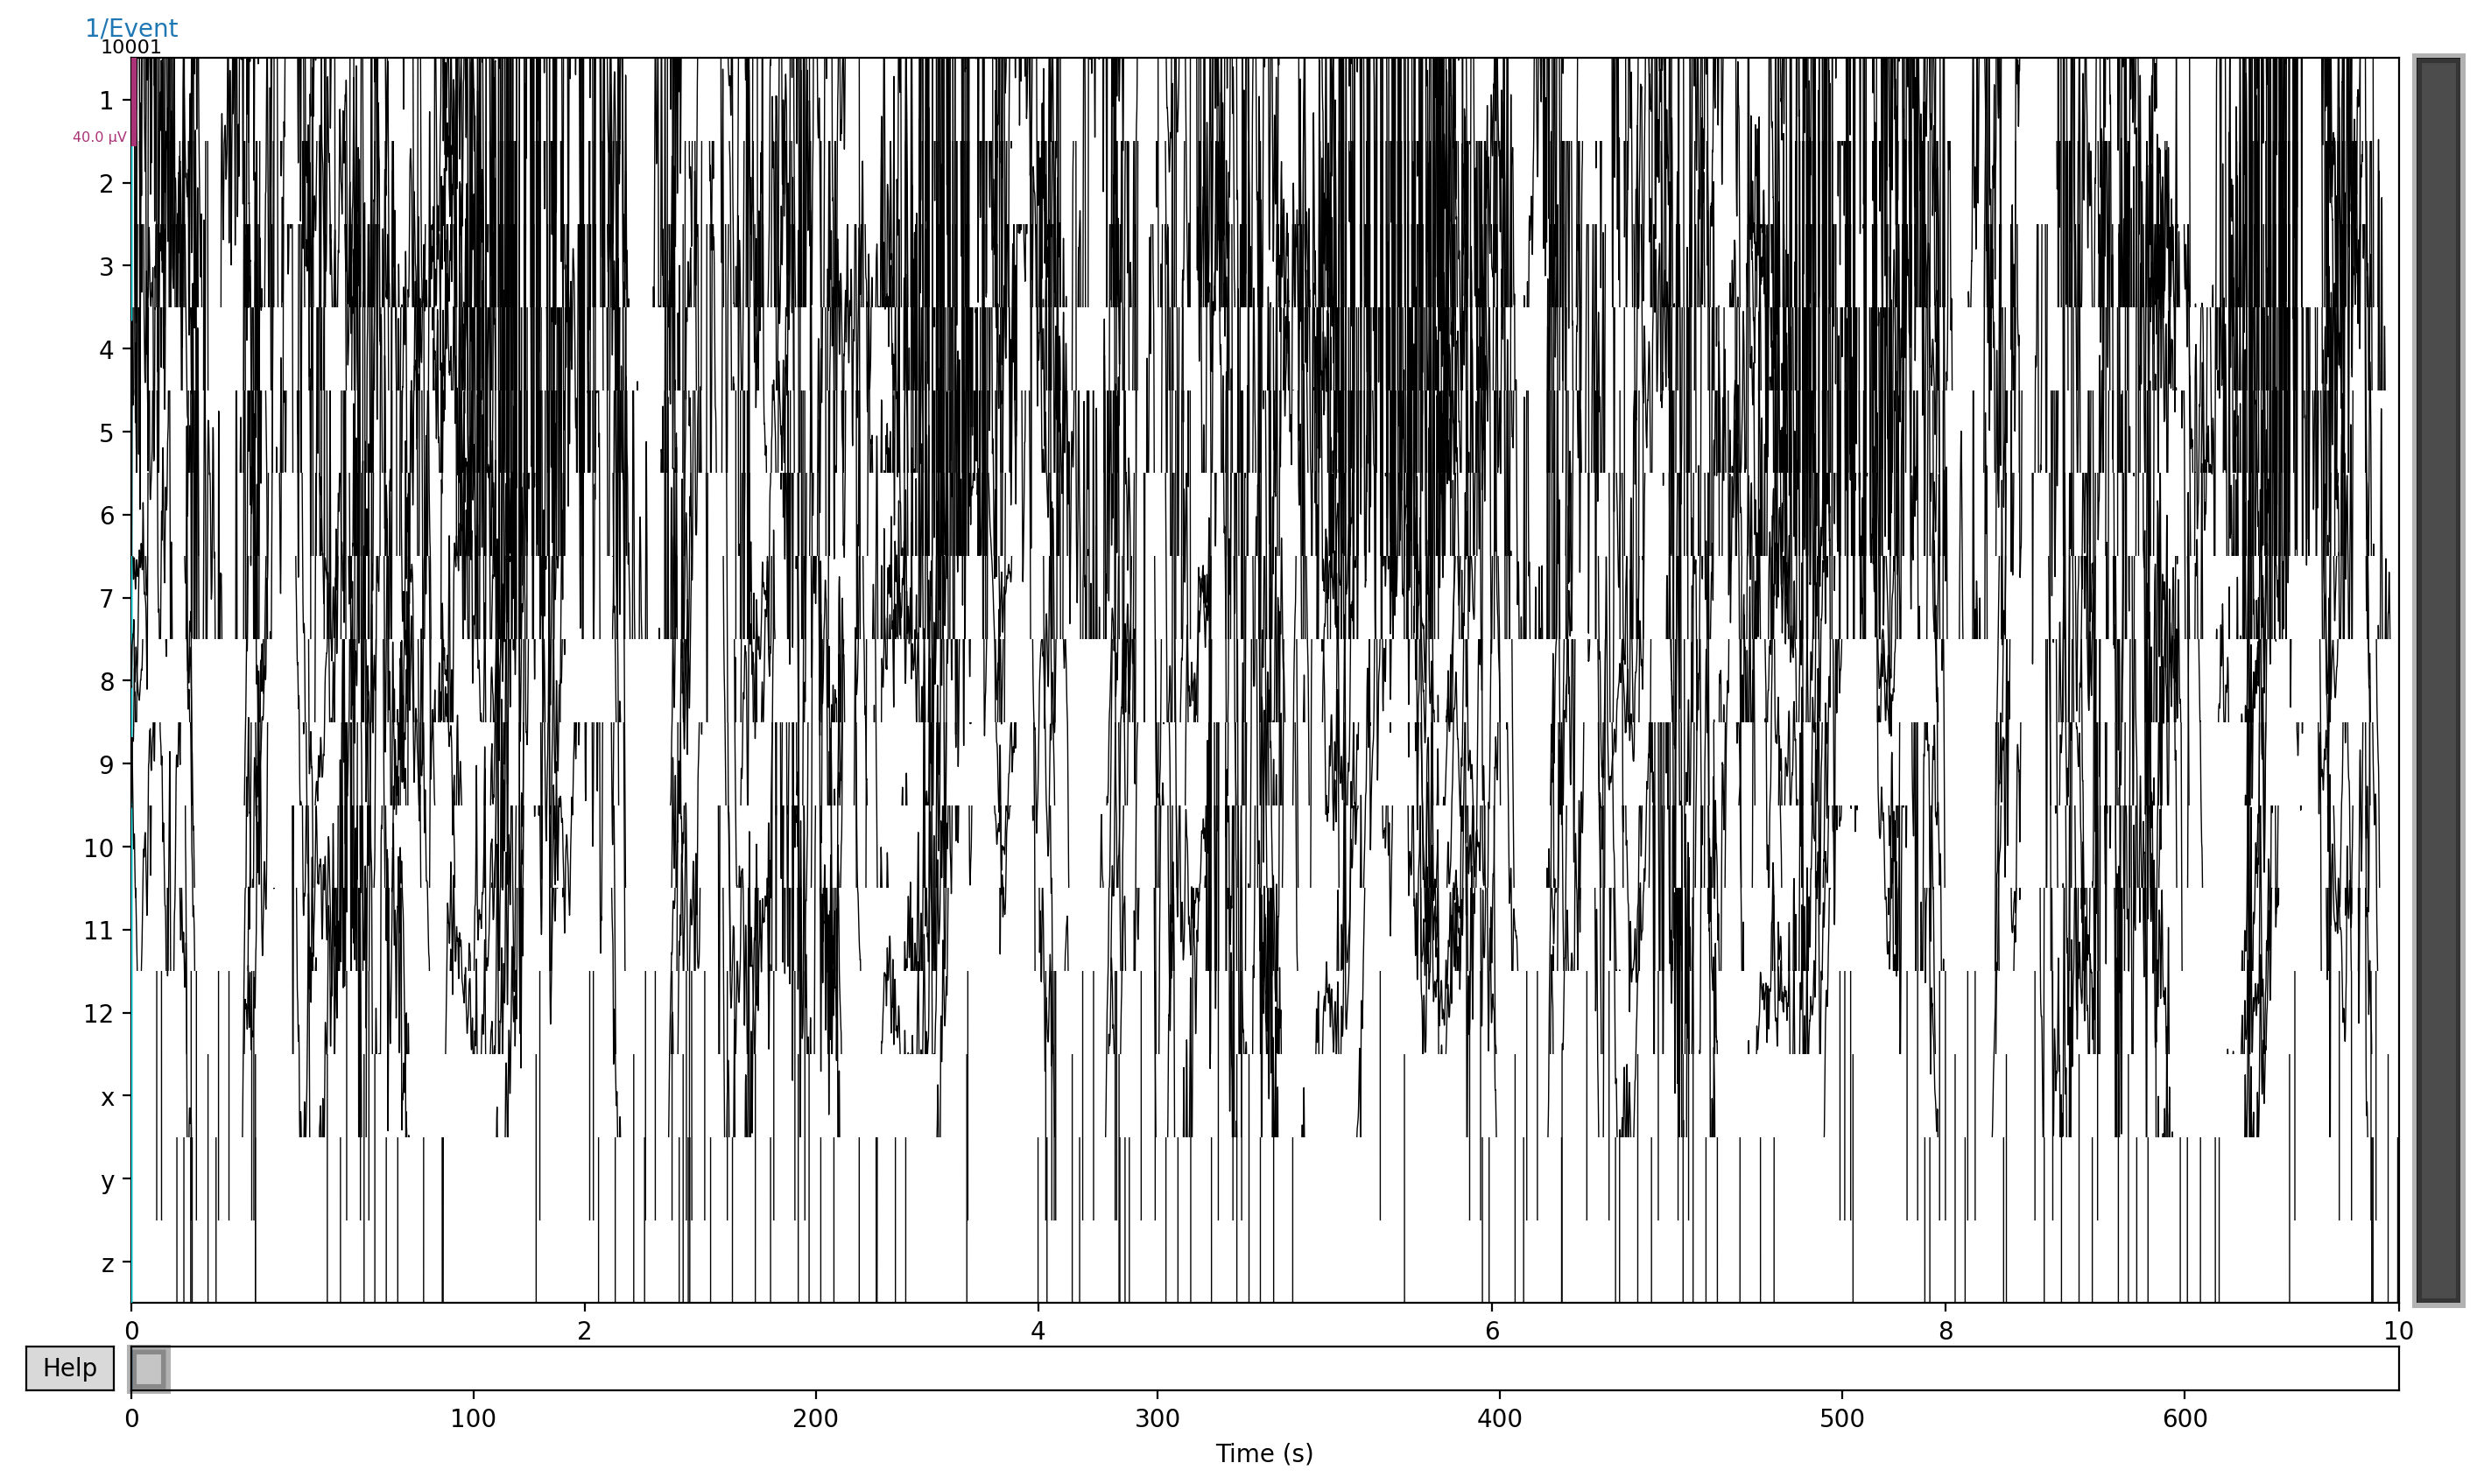

In [126]:
raw_data.plot(events)

In [11]:
raw_data.ch_names

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'x', 'y', 'z']

In [12]:
#Extract only accelerometry data
raw_data_acc=raw_data.copy().drop_channels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

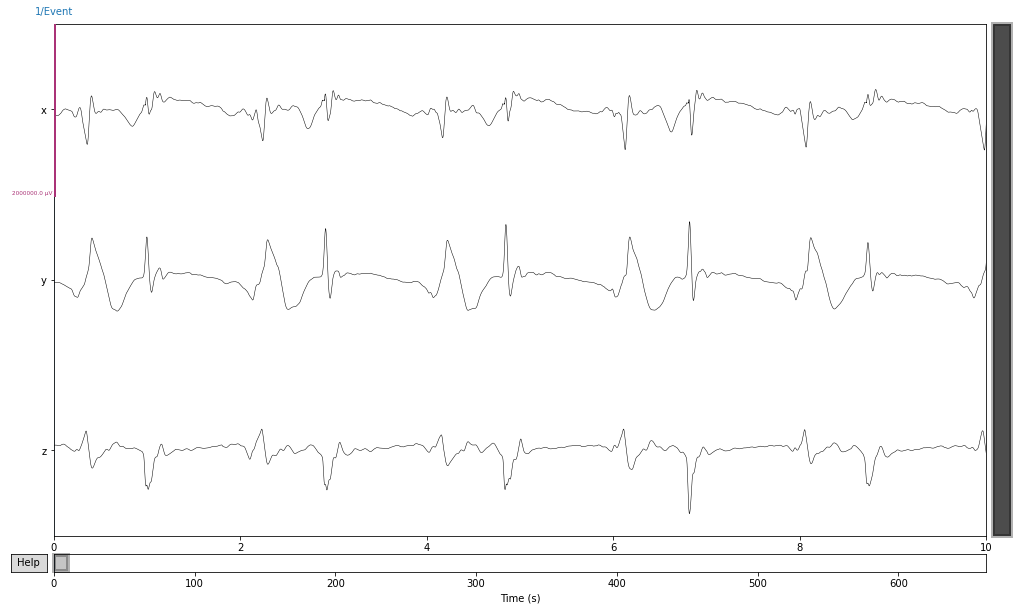

In [13]:
raw_data_acc.plot(scalings={'eeg':0.1e1})
plt.show()

In [14]:
#taking the matrix of accelerometry data
xyz=raw_data_acc.get_data()


In [15]:
#we working with y axes becaise it is the best one
y_data=xyz[1,:]

In [16]:

start=0
period=3800
end=start+period


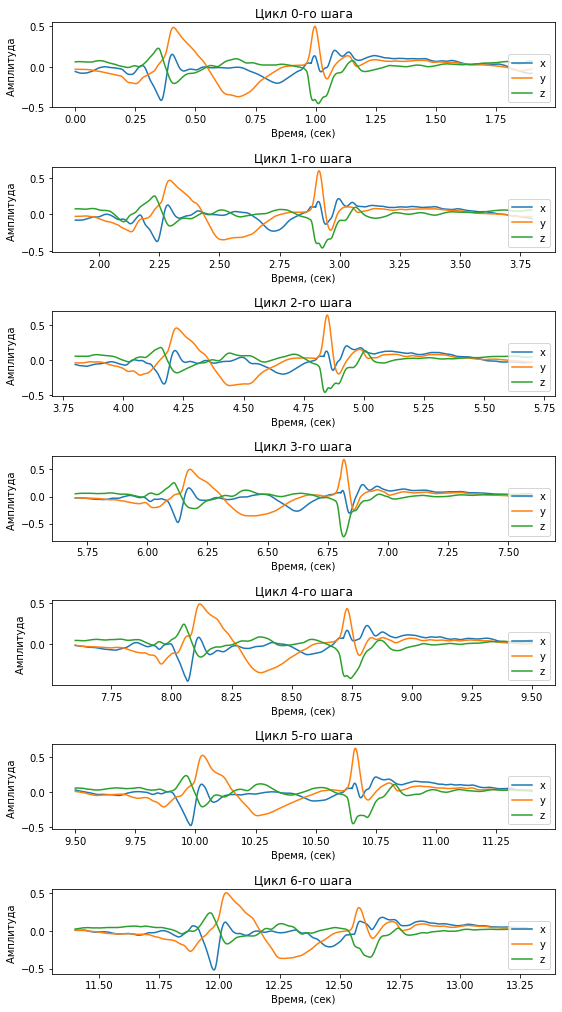

In [17]:
'''
plot several cycles to check how acc data looks like
'''

plt.close()

cycles=7

fig,ax=plt.subplots(cycles,1, figsize=(9,2.5*cycles))
plt.subplots_adjust(hspace=0.7)

for i in range(cycles):
    ax[i].plot( np.arange(start+period*i,end+period*i)/raw_data.info['sfreq'],  xyz[:,start+period*i:end+period*i].T  , label=['x', 'y', 'z'])
    ax[i].set_title('Цикл '+str(i)+'-го шага')
    ax[i].set_xlabel('Время, (сек)')
    ax[i].set_ylabel('Амплитуда ')
    ax[i].legend(loc='lower right')


In [18]:
def find_peaks(array_, koef=1.1, max_flg=False):

    mean_=np.mean(array_)
    std_=np.std(array_)

    max_=mean_+koef*std_
    min_=mean_-koef*std_

    max_array_=[max_]*len(array_)
    min_array_=[min_]*len(array_)

    inds=np.where(array_>max_)[0]
    
    if max_flg:
        return inds, max_
    
    else:
        return inds
    
    
def find_peaks_min(array_, koef=1.1, max_flg=False):

    mean_=np.mean(array_)
    std_=np.std(array_)

    max_=mean_+koef*std_
    min_=mean_-koef*std_

    max_array_=[max_]*len(array_)
    min_array_=[min_]*len(array_)

    inds=np.where(array_<min_)[0]
    
    if max_flg:
        return inds, min_
    
    else:
        return inds
    
def reduce_peaks(marks_array_inds,  threhold, with_log=False,):
    
    new_marks_array_inds=[marks_array_inds[0]]
    for i in range(1,len(marks_array_inds)):
        if marks_array_inds[i]-new_marks_array_inds[-1]<threhold:
            if with_log:
                print(i)
        else:
            new_marks_array_inds.append(marks_array_inds[i])

    return new_marks_array_inds


In [19]:
#extracting peak of y acceletimetry 
inds=find_peaks(y_data,1.7)

In [51]:
plt.close()
fig,ax=plt.subplots(2,1, figsize=(12,8))
ax[0].plot(y_data)
ax[0].plot(inds,y_data[inds], '.')


new_peaks=reduce_peaks(inds, 2000) #reducing its number
ax[1].plot(y_data)
ax[1].plot(new_peaks,y_data[new_peaks], '.')

In [21]:
%matplotlib qt5

In [112]:
events_max=np.array(new_peaks)+raw_data.first_samp+1400

In [105]:

zeros=[0]*len(events_max)
marks=[1]*len(events_max)

ones=np.vstack([events_max,zeros,marks]).T


zeros=[0]*len(events_max)
marks=[2]*len(events_max)
twos=events_max+800

twos=np.vstack([twos,zeros,marks]).T




In [113]:
ones

array([[  29134,       0,       1],
       [  32899,       0,       1],
       [  36758,       0,       1],
       ...,
       [1342458,       0,       1],
       [1346498,       0,       1],
       [1350507,       0,       1]])

In [114]:
len(ones)
len(twos)

346

In [115]:
events=np.vstack([ones,twos])
events=events[events[:, 0].argsort()]
events[:,0]=events[:,0]

In [116]:
raw_data.first_samp

26867

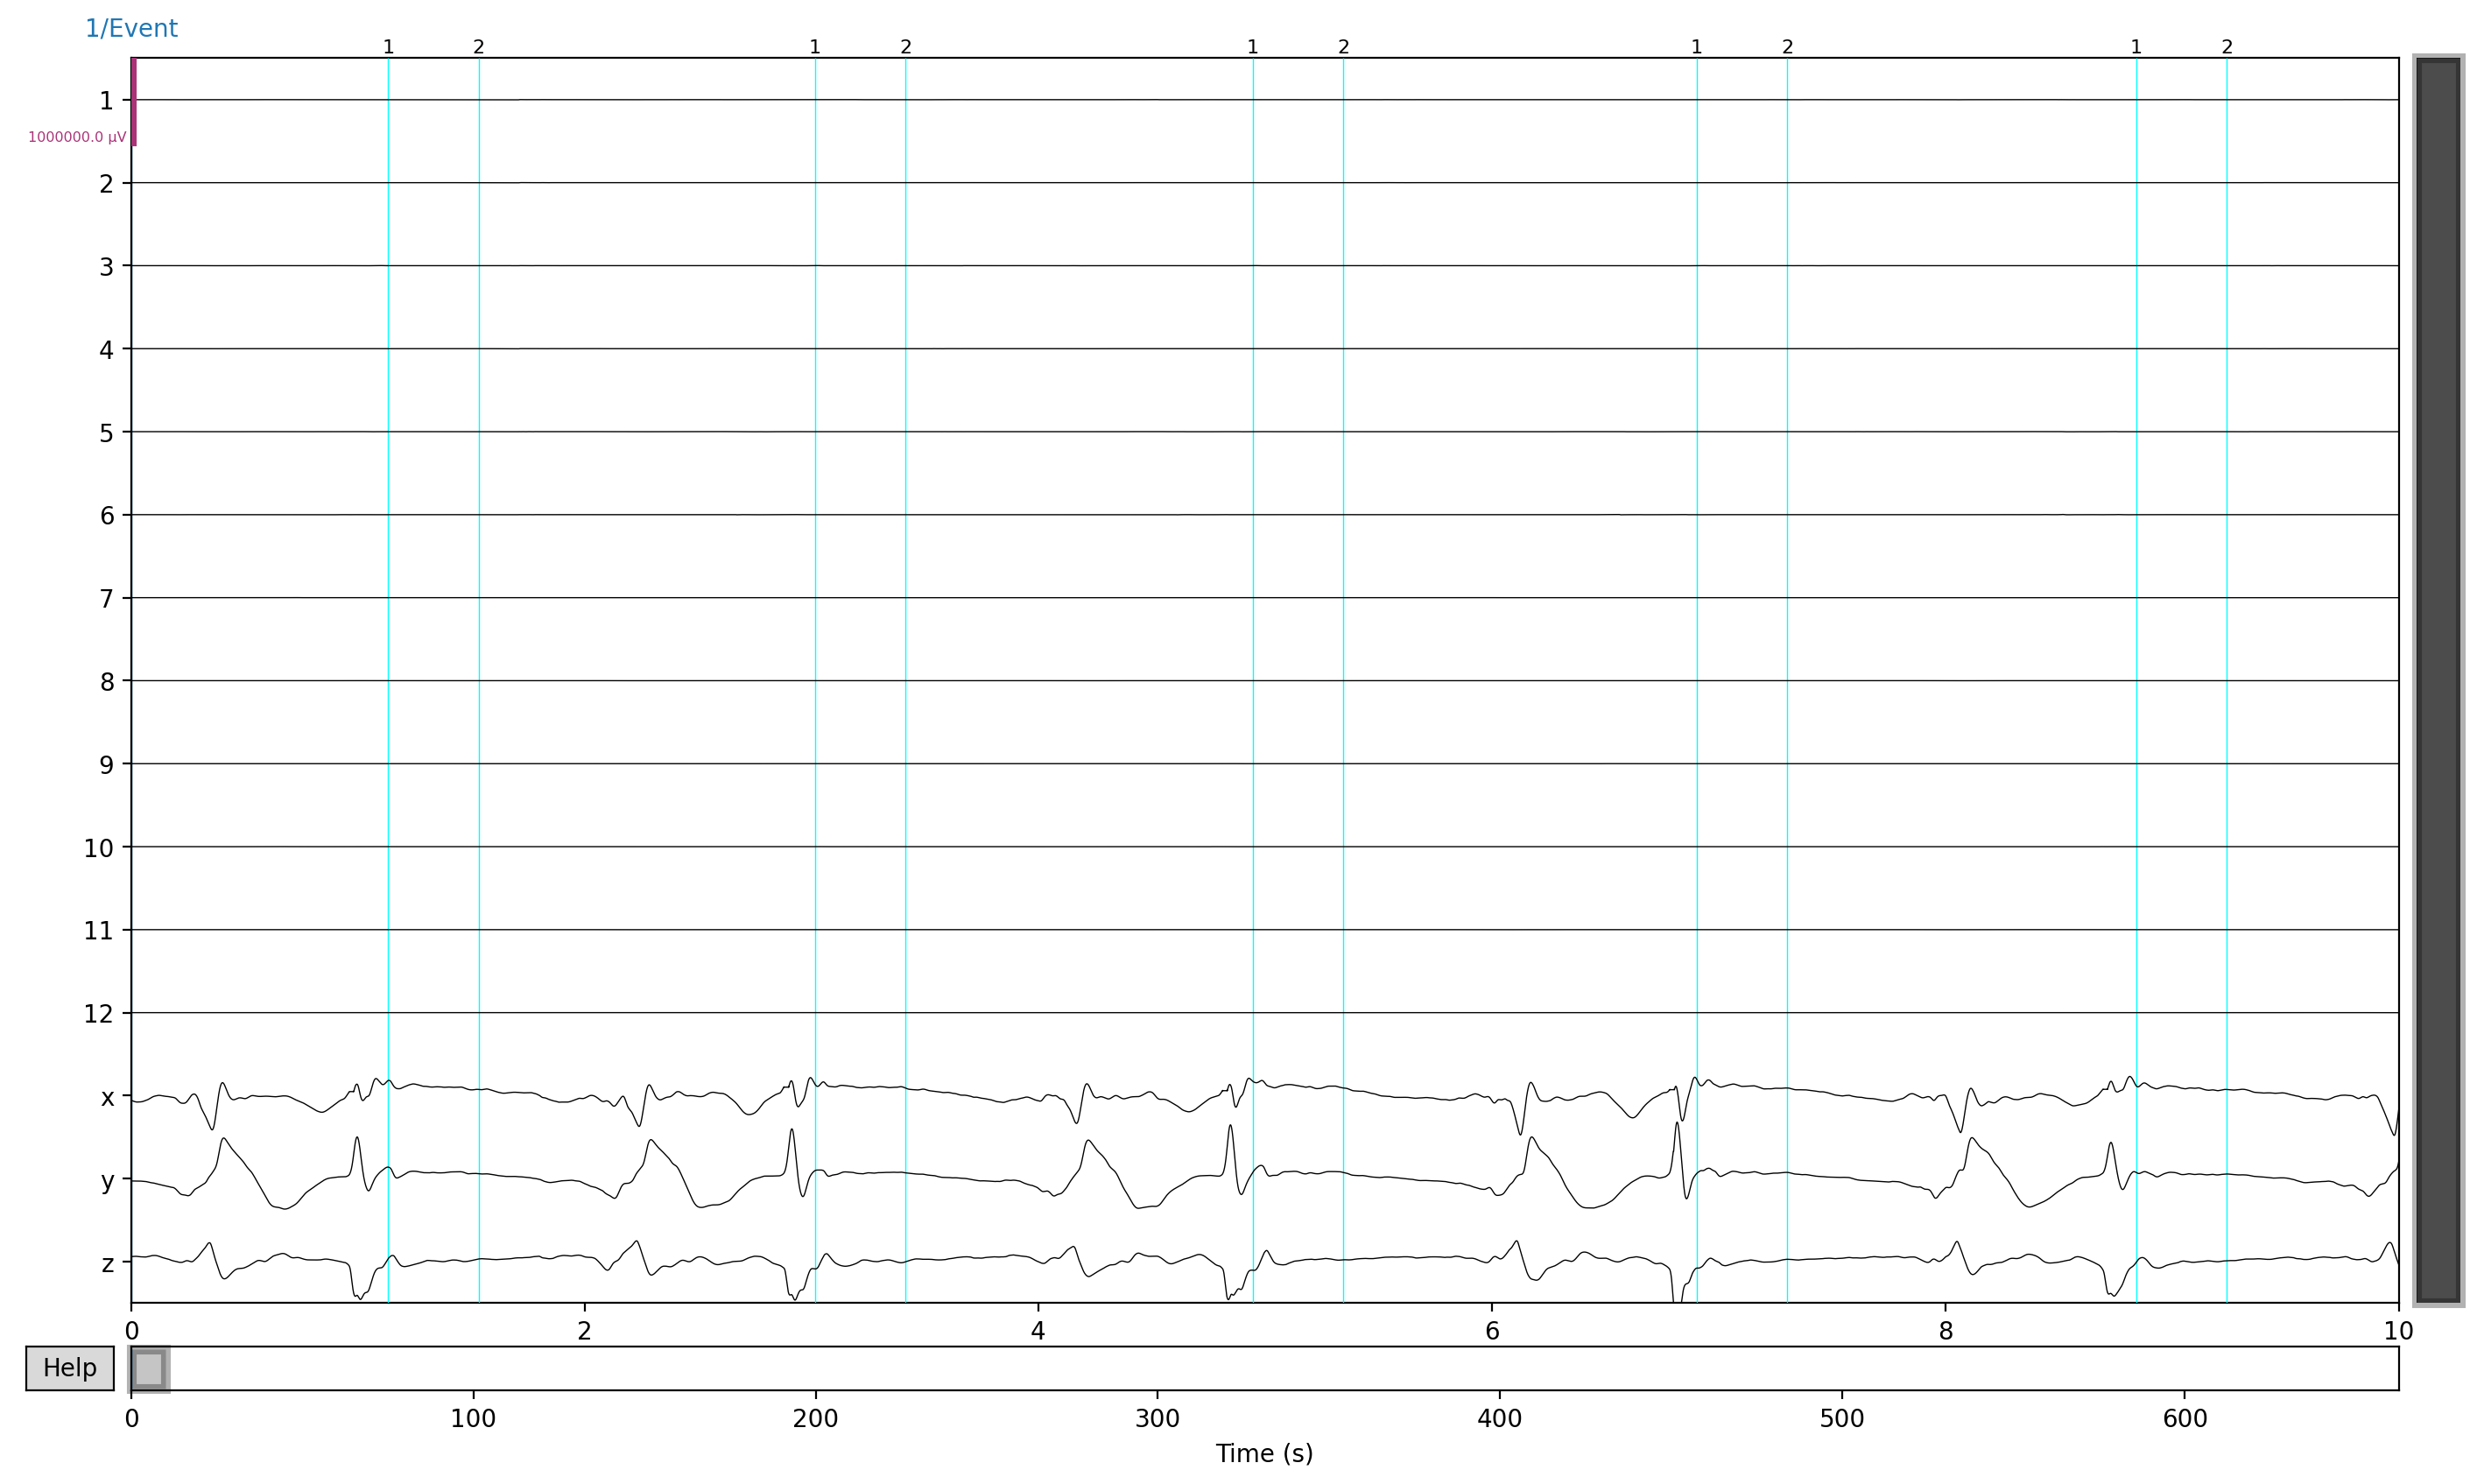

Channels marked as bad: none


In [110]:
raw_data.plot(events,scalings={'eeg':5e-1})

In [117]:
for ind in np.arange(100,120,5):
    
    s=( (ones[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
    print(s)
    get_frame(video_path,s)
    
    
    s=( (twos[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
    print(s)
    get_frame(video_path,s)
    
    plt.figure()
    print((ones[ind,0])-2000-raw_data.first_samp)
    plt.plot(y_data[(ones[ind,0])-2000-raw_data.first_samp:(ones[ind,0])+2000-raw_data.first_samp] )
    plt.scatter(2001,y_data[ (ones[:,0])[ind]-raw_data.first_samp])


193.619
193.62676666667522
194.019
194.02716666667524
385238
203.017
203.03616666667577
203.417
203.4365666666758
404034
212.5975
212.61240000000964
212.9975
213.0128000000097
423195
222.3935
222.42220000001024
222.7935
222.82260000001025
442787


In [29]:
ind=30

s=( (ones[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
print(s)
get_frame(video_path,s)

s=( (twos[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
print(s)
get_frame(video_path,s)

57.5705
57.590866666667324
57.9705
57.99126666666735


In [112]:
raw_data_emg=raw_data.copy().drop_channels(['x','y','z'])


SAMPLING_FREQUENCY = raw_data_emg.info['sfreq']
CHANNEL_NUMBER = len(raw_data_emg.ch_names)
BANDPASS_LIMITS = (200, 500)

In [113]:
raw_hil = raw_data_emg.copy().filter(BANDPASS_LIMITS[0], BANDPASS_LIMITS[1]).apply_hilbert(envelope=True).filter(0, 20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2e+02 - 5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 200.00
- Lower transition bandwidth: 50.00 Hz (-6 dB cutoff frequency: 175.00 Hz)
- Upper passband edge: 500.00 Hz
- Upper transition bandwidth: 125.00 Hz (-6 dB cutoff frequency: 562.50 Hz)
- Filter length: 133 samples (0.067 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter l

In [114]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib

def conf_matrix_plot(categs, matrix_bef, size=3,perc_flg=True):
    
    group_percentages = ["{0:.2%}".format(value) for value in
                     matrix_bef.flatten()/np.sum(matrix_bef)]
    
    if perc_flg:
        labels = np.asarray(group_percentages).reshape(size,size)
    else:
        labels =matrix_bef
    sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
    matplotlib.rcParams.update({'font.size': 32})
    fig1, ax1 = plt.subplots(figsize=[10,8])
    sns.heatmap(matrix_bef,cmap='Blues',xticklabels=categs,yticklabels=categs,annot=labels, fmt='',ax=ax1)

    #matplotlib.rcParams.update({'font.size': defa})

In [121]:
epochs=mne.Epochs(raw_hil, events=events, tmin=-0.5, tmax=0.0, 
                        preload=True, 
                        baseline=None).apply_hilbert(envelope=True)

Not setting metadata
Not setting metadata
998 matching events found
No baseline correction applied
0 projection items activated
Loading data for 998 events and 1001 original time points ...
1 bad epochs dropped


In [122]:
epochs

Number of events,997
Events,1: 4982: 499
Time range,-0.500 – 0.000 sec
Baseline,off


In [123]:
def get_features_labels(epochs):
    X=[]
    for i in range(epochs._data.shape[0]):
        channel_names = np.arange(CHANNEL_NUMBER).astype(str).tolist()
        channel_types = ['emg']*CHANNEL_NUMBER
        info = mne.create_info(channel_names, SAMPLING_FREQUENCY, channel_types)
        raw = mne.io.RawArray(epochs._data[i], info, verbose=False)
        raw.filter(BANDPASS_LIMITS[0], BANDPASS_LIMITS[1], picks=['emg'], n_jobs=4)
        x__=[]
        # Mean absolute value
        for channel in raw.get_data():
            x__.append(channel.mean())
        # Matematical expactation
        for channel in raw.get_data():
            x__.append(channel.std())
        # Variance
        for channel in raw.get_data():
            x__.append(channel.var())
        # Waveform length
        for channel in raw.get_data():
            x__.append(np.sum(np.diff(channel, n=1)))
        # Number pf peaks
        for channel in raw.get_data():
            x__.append(len(find_peaks(channel)))
        
        # Append PCA of epoch data
        pca = PCA(6)
        pv = pca.fit_transform(epochs._data[i])
                         
        X.append(x__)
    X = np.array(X).squeeze()
    y = epochs.events[:,-1].flatten()
    return X, y


In [124]:

X, y = get_features_labels(epochs)

print('X: ', X.shape)
print('Y: ', y.shape)
#classifier = SVC(C=0.8, kernel='rbf', probability=True)
# cross_val_score(classifier, X, y, cv=3)
#classifier.fit(X, y)
#classifier.score(X, y)

X:  (997, 60)
Y:  (997,)


In [125]:
classifier = SVC(C=0.8, kernel='rbf', probability=True)
#cross_val_score(classifier, X, y, cv=3)
classifier.fit(X, y)
classifier.score(X, y)

0.8324974924774323

In [127]:
tscv=TimeSeriesSplit(max_train_size=None, n_splits=4)

ac_list=[]

for train_index, test_index in tscv.split(X):
    print()
    #print("TRAIN:", train_index, "TEST:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("TRAIN:", X_train.shape,y_train.shape )
    print("TEST:", X_test.shape, y_test.shape) 
    
    
    classifier.fit(X_train, y_train)
    ac=classifier.score(X_test, y_test)
    print('Accuracy:', ac)
    
    ac_list.append(ac)
    
    #matrix=confusion_matrix(y_test,preds)
    
    preds=classifier.predict(X_test)
    matrix=confusion_matrix(y_test,preds)
    #plt.
    
    #conf_matrix_plot(categs, matrix)
    #conf_matrix_plot(categs, matrix , perc_flg=False)
    
    categs=['Фаза-1','Фаза-2']
    conf_matrix_plot(categs, matrix,2)
    conf_matrix_plot(categs, matrix ,2, perc_flg=False)
    


TRAIN: (201, 60) (201,)
TEST: (199, 60) (199,)
Accuracy: 0.8341708542713567

TRAIN: (400, 60) (400,)
TEST: (199, 60) (199,)
Accuracy: 0.7135678391959799

TRAIN: (599, 60) (599,)
TEST: (199, 60) (199,)
Accuracy: 0.8090452261306532

TRAIN: (798, 60) (798,)
TEST: (199, 60) (199,)
Accuracy: 0.8241206030150754


In [106]:
ac_list

[0.6482412060301508, 0.628140703517588, 0.7537688442211056, 0.7839195979899497]

In [128]:
plt.figure()
plt.plot(np.arange(4),ac_list, 'g.-')
plt.xlabel('Тестируемая выборка')
plt.ylabel('Точность предсказания')
plt.xticks(np.arange(4), ['1-ая четверть', '2-ая четверть', '3-ая четверть','4-ая четверть'])
plt.grid()

In [129]:
zeros=[0]*len(events_max)
marks=[3]*len(events_max)

threes=np.vstack([np.array(events_max)+1500,zeros,marks]).T

#twos=np.vstack([events_max,zeros,marks]).T



In [131]:
events=np.vstack([ones,twos, threes]) 
events=events[events[:, 0].argsort()]
events[:,0]=events[:,0]#-raw_data.first_samp


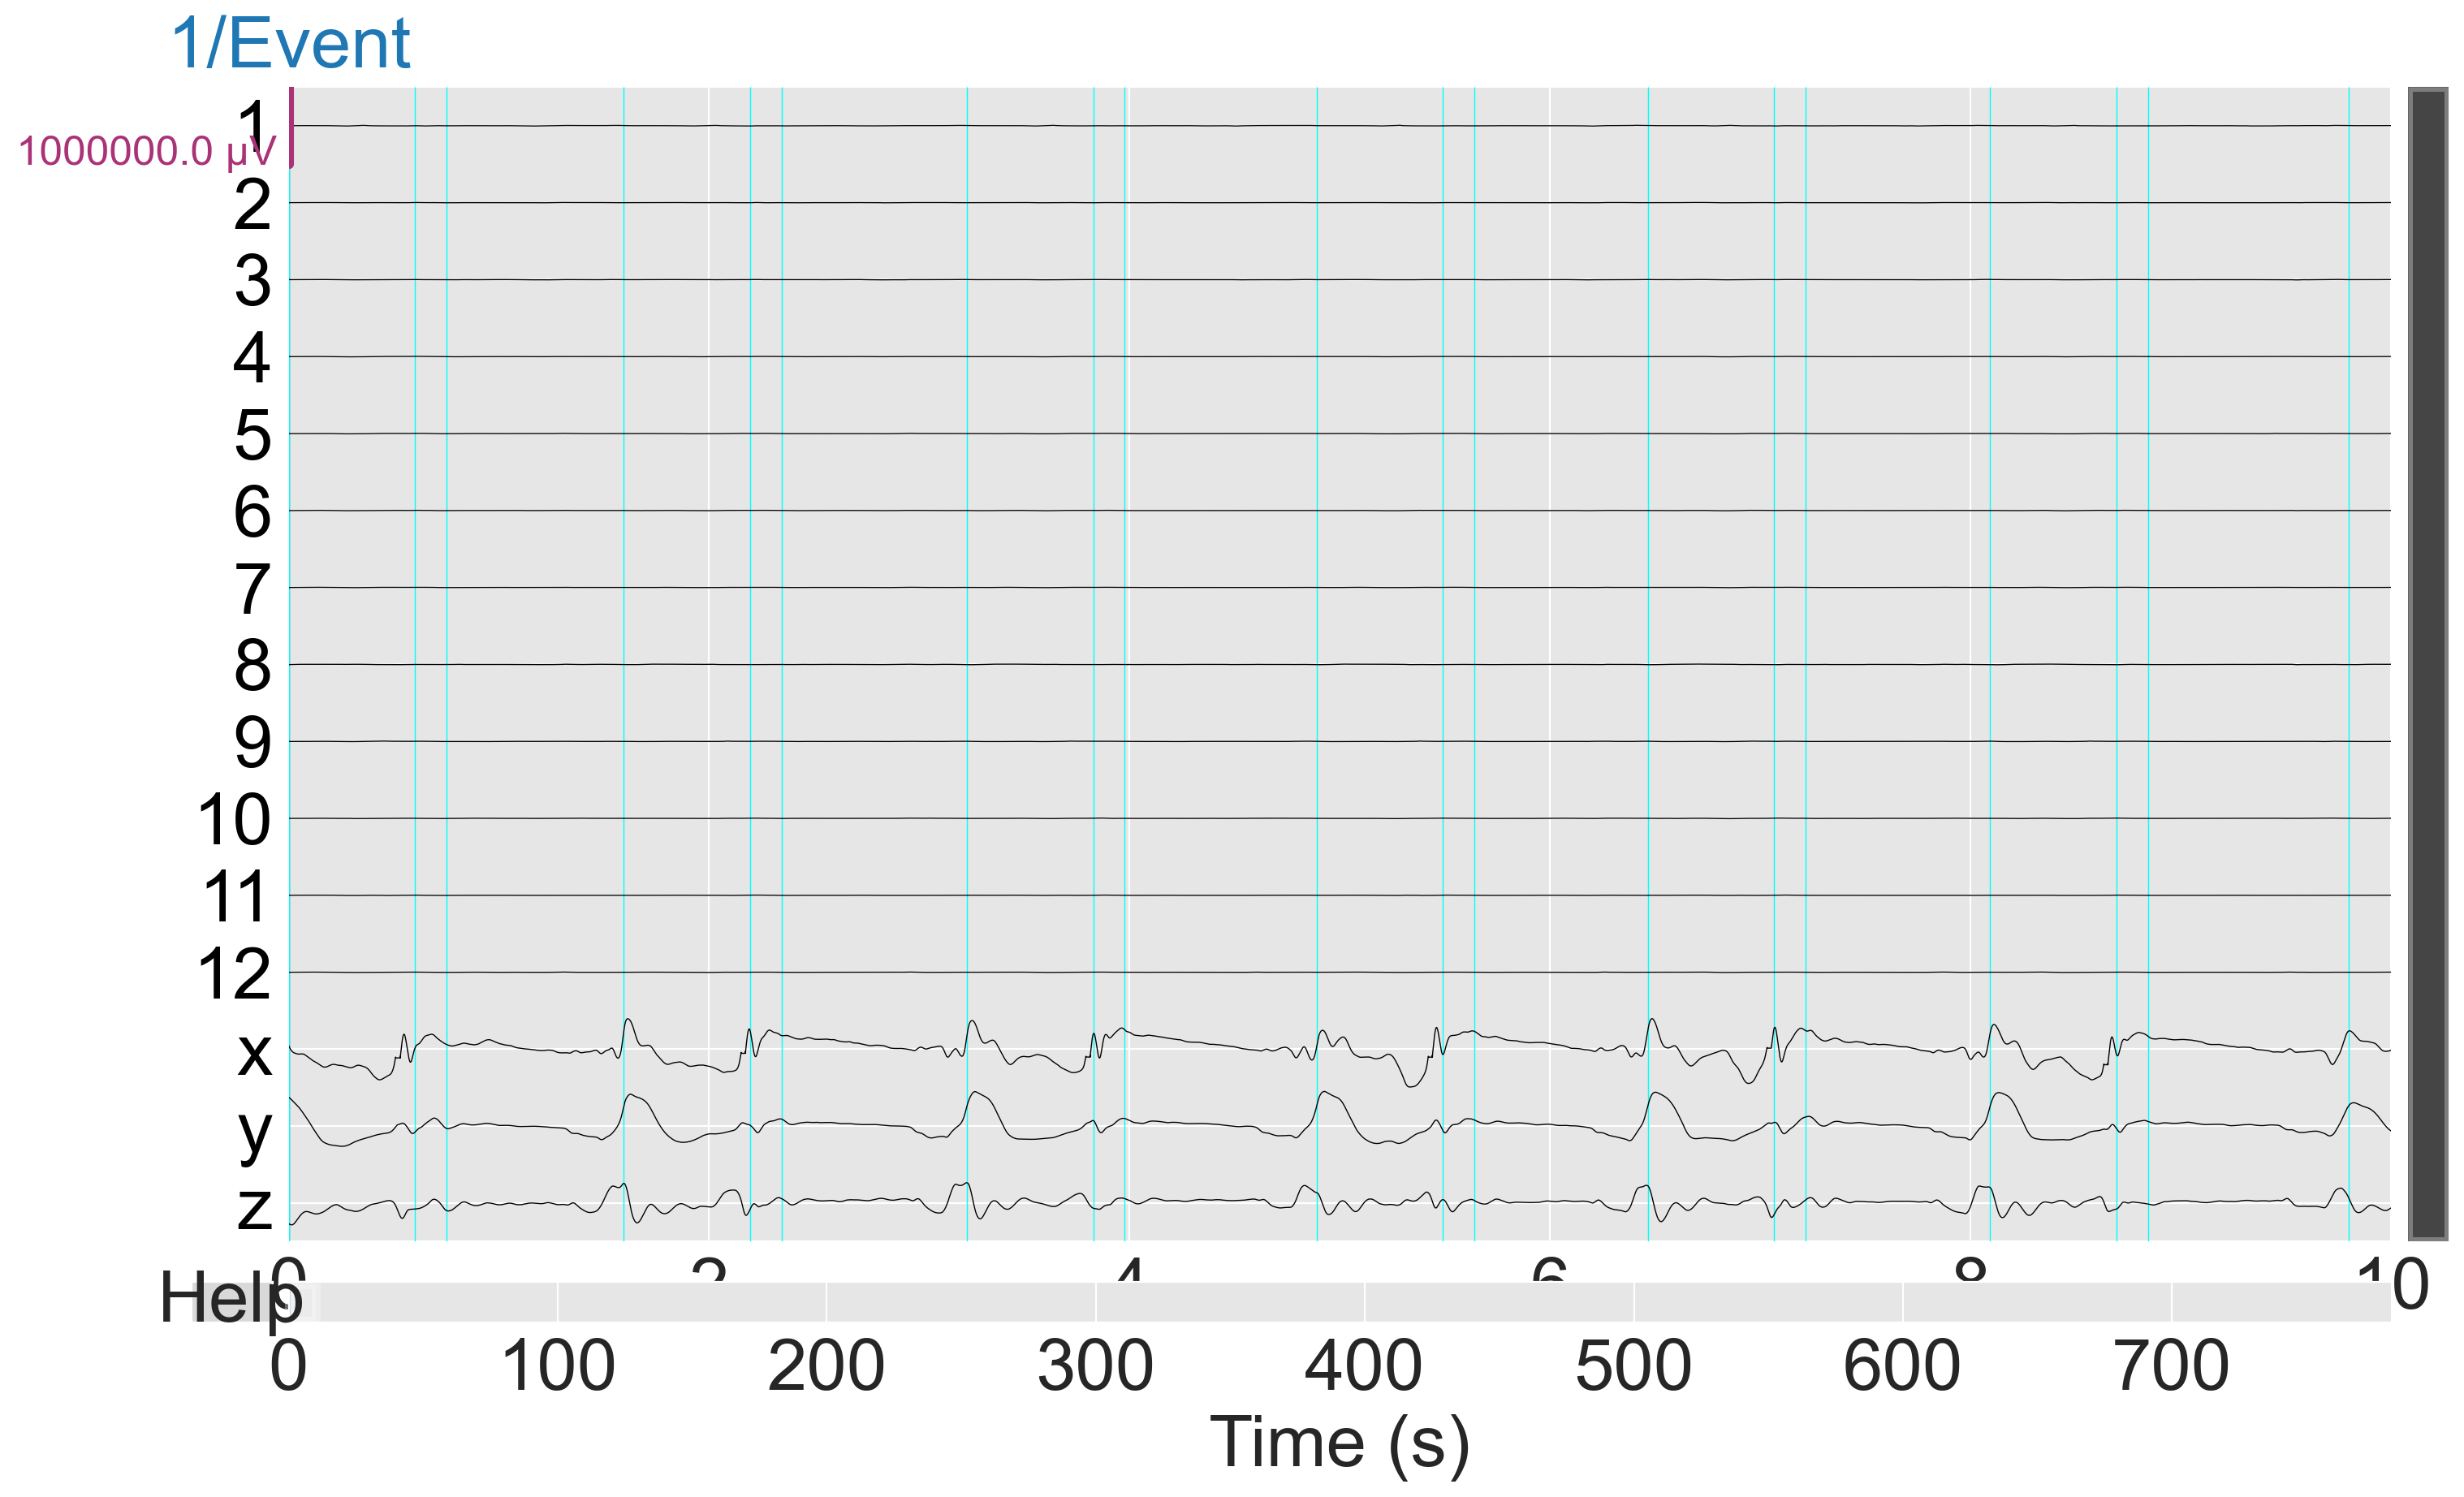

In [132]:
raw_data.plot(events,scalings={'eeg':5e-1})

In [143]:
zeros=[0]*len(events_max)
marks=[4]*len(events_max)

fores=np.vstack([np.array(events_max)+2000,zeros,marks]).T

#twos=np.vstack([events_max,zeros,marks]).T




In [144]:

events=np.vstack([ones,twos, threes, fores])
events=events[events[:, 0].argsort()]


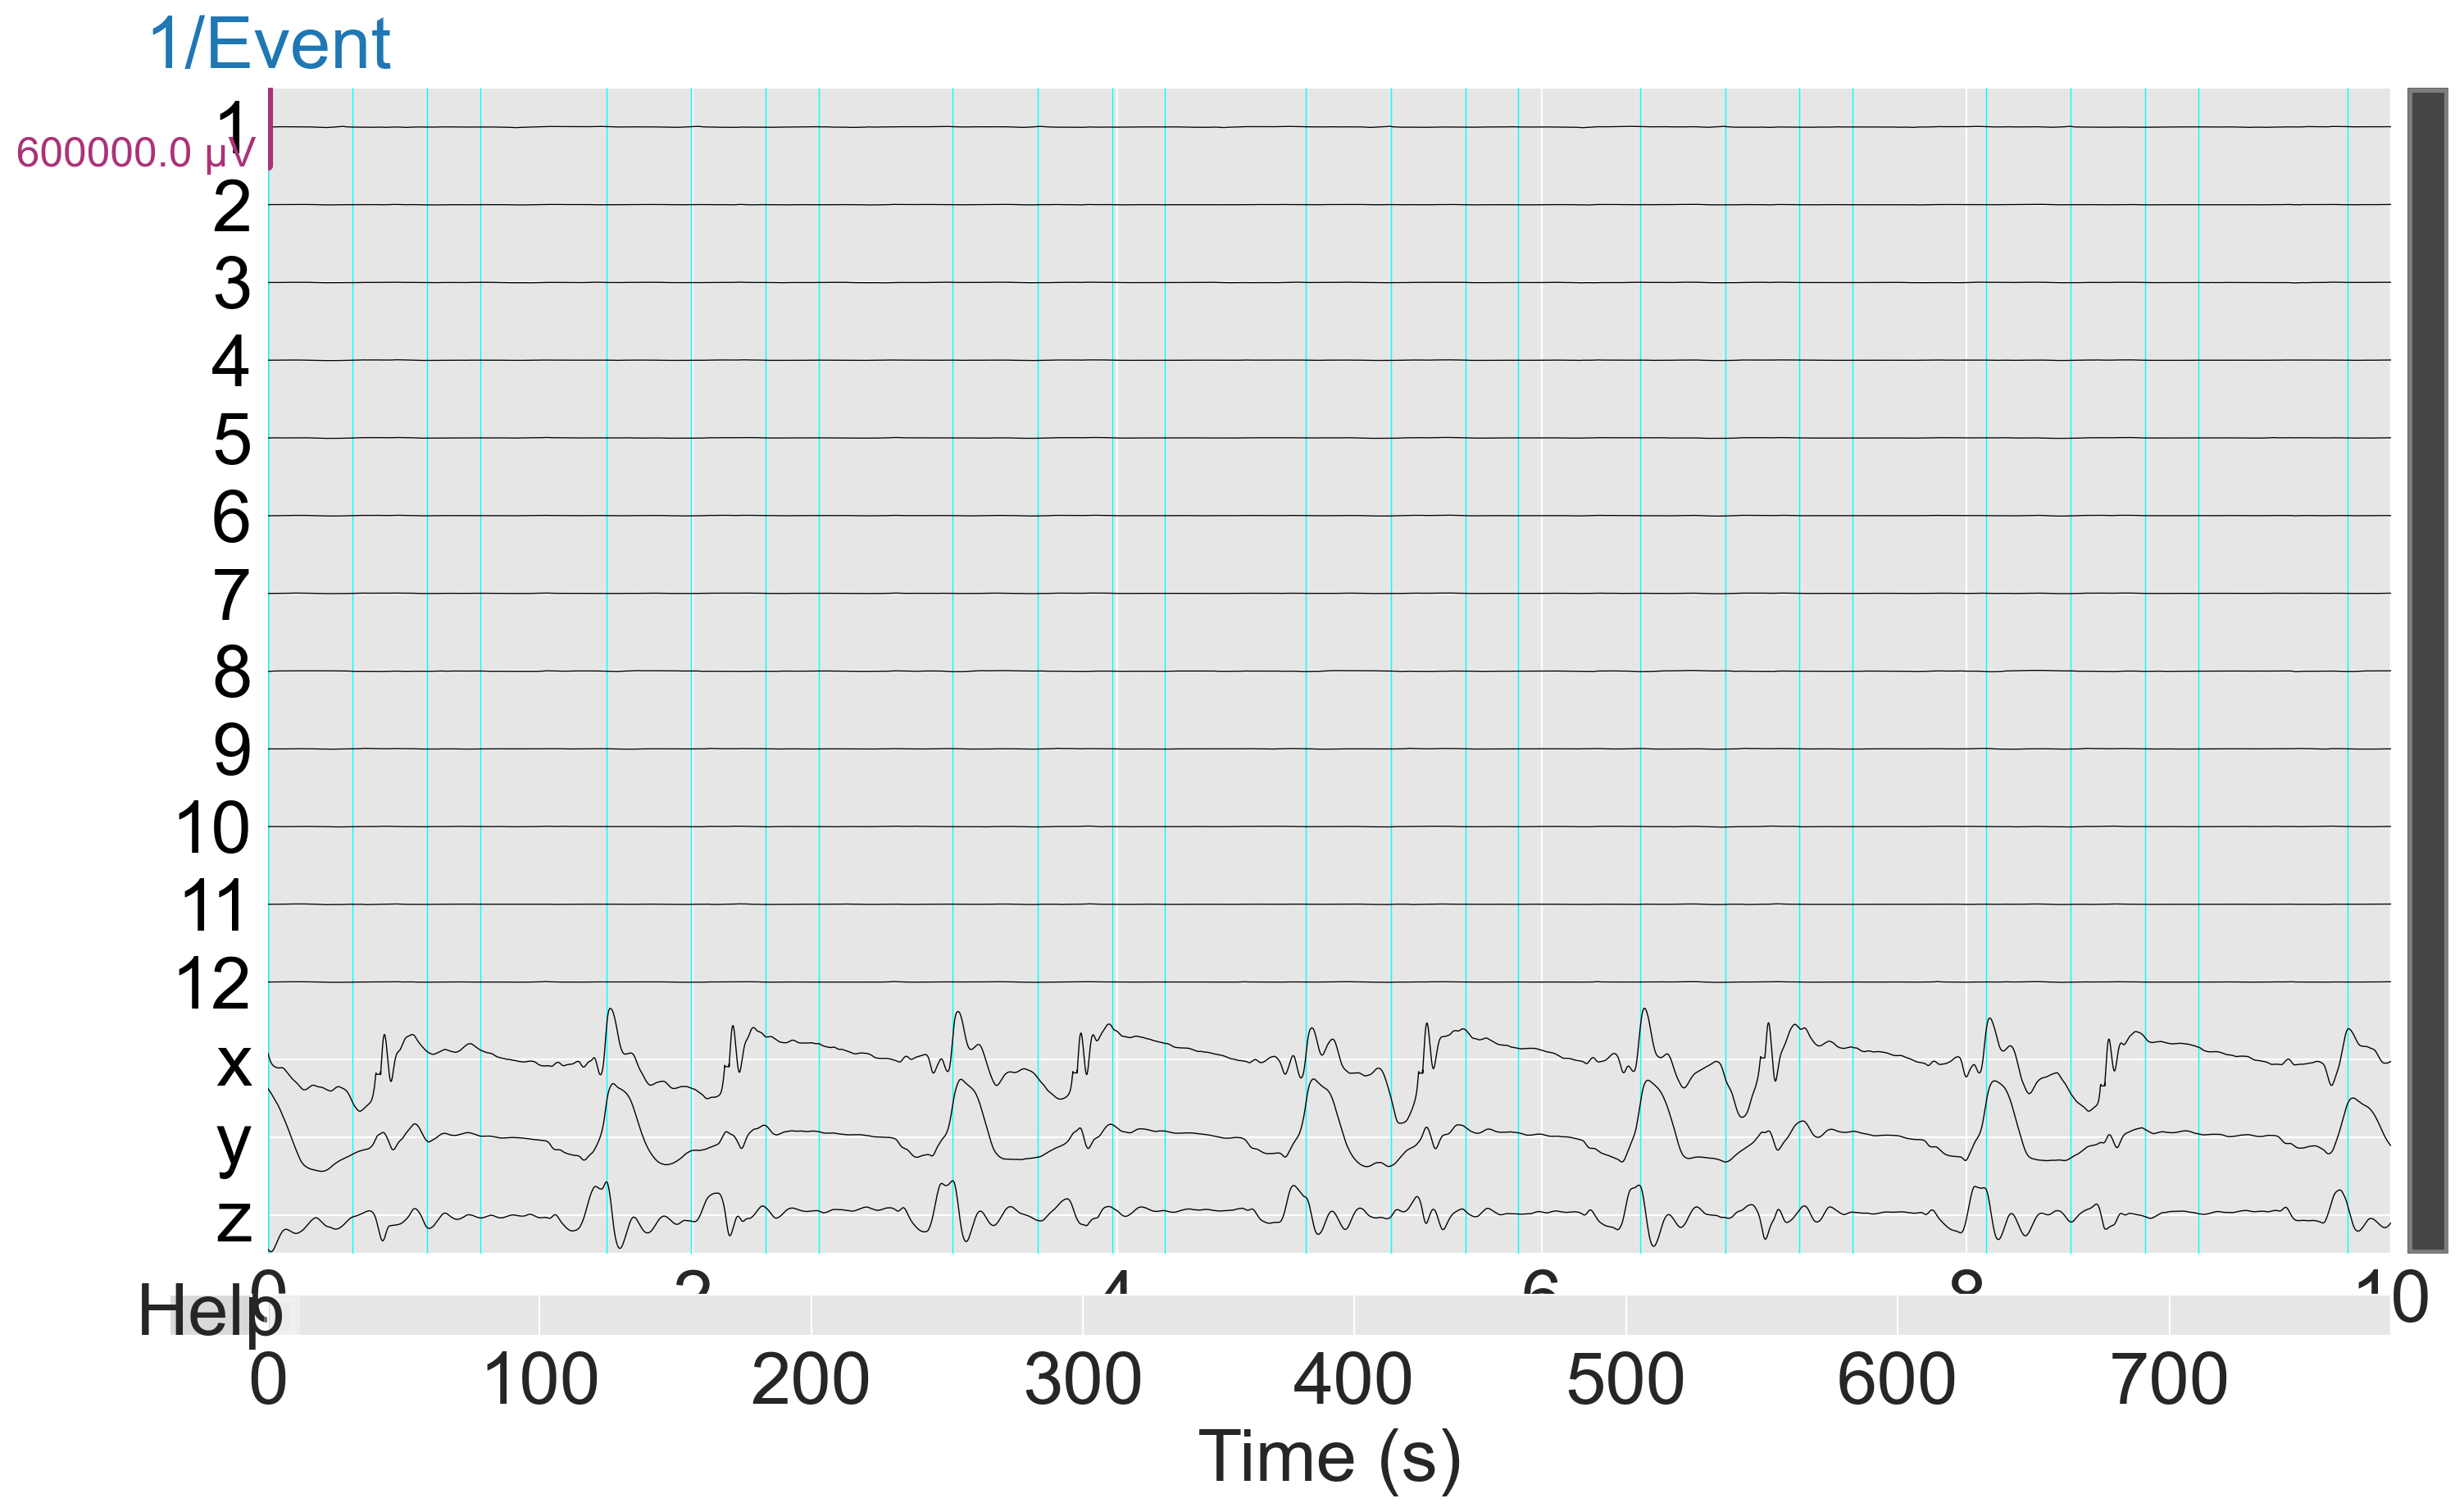

In [145]:
raw_data.plot(events,scalings={'eeg':0.3e0})

In [146]:
print((ones[:,0]/raw_data.info['sfreq'])[:1])#приземление на пятку
print((twos[:,0]/raw_data.info['sfreq'])[:1])#отрыв пятки 
print((threes[:,0]/raw_data.info['sfreq'])[:1])#опопа на пятку 
print((fores[:,0]/raw_data.info['sfreq'])[:1])

[6.3385]
[6.7385]
[7.0885]
[7.3385]


In [147]:
#fps = vcap.get(cv2.CV_CAP_PROP_FPS)

video_path='../../../lj.mp4'


In [152]:
ind=30

s=( (ones[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
print(s)
get_frame(video_path,s)

s=( (twos[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
print(s)
get_frame(video_path,s)


s=( (threes[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
print(s)
get_frame(video_path,s)

s=( (fores[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
print(s)
get_frame(video_path,s)


48.355
48.38166666666679
48.755
48.782066666666815
49.105
49.115733333333495
49.355
49.38266666666684


In [154]:
print(10)

10


In [163]:
epochs=mne.Epochs(raw_hil, events=events, tmin=-0.5, tmax=0.0, 
                        preload=True, 
                        baseline=None).apply_hilbert(envelope=True)

Not setting metadata
Not setting metadata
1996 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1996 events and 1001 original time points ...
2 bad epochs dropped


In [164]:

X, y = get_features_labels(epochs)

print('X: ', X.shape)
print('Y: ', y.shape)
#classifier = SVC(C=0.8, kernel='rbf', probability=True)
# cross_val_score(classifier, X, y, cv=3)
#classifier.fit(X, y)
#classifier.score(X, y)

X:  (1994, 60)
Y:  (1994,)


In [165]:
classifier = SVC(C=0.8, kernel='rbf', probability=True)
#cross_val_score(classifier, X, y, cv=3)
classifier.fit(X, y)
classifier.score(X, y)

0.5827482447342026

In [166]:
print(10)

10


In [167]:
categs=['Фаза-1','Фаза-2', 'Фаза-3', 'Фаза-4']

In [168]:
tscv=TimeSeriesSplit(max_train_size=None, n_splits=4)
for train_index, test_index in tscv.split(X):
    print()
    #print("TRAIN:", train_index, "TEST:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("TRAIN:", X_train.shape,y_train.shape )
    print("TEST:", X_test.shape, y_test.shape) 
    
    
    classifier.fit(X_train, y_train)
    ac=classifier.score(X_test, y_test)
    print('Accuracy:', ac)
    
    
    preds=classifier.predict(X_test)
    matrix=confusion_matrix(y_test,preds)
    #plt.
    
    conf_matrix_plot(categs, matrix, size=4)
    conf_matrix_plot(categs, matrix , perc_flg=False,size=4)


TRAIN: (402, 60) (402,)
TEST: (398, 60) (398,)
Accuracy: 0.44472361809045224

TRAIN: (800, 60) (800,)
TEST: (398, 60) (398,)
Accuracy: 0.6005025125628141

TRAIN: (1198, 60) (1198,)
TEST: (398, 60) (398,)
Accuracy: 0.6005025125628141

TRAIN: (1596, 60) (1596,)
TEST: (398, 60) (398,)
Accuracy: 0.5904522613065326
Channels marked as bad: none
Channels marked as bad: none
Channels marked as bad: none
